In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.datasets import cifar10
from keras import models, layers
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
# Load the CIFAR -10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:
train_images.shape

(50000, 32, 32, 3)

In [4]:
train_labels[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [5]:
test_images.shape

(10000, 32, 32, 3)

In [6]:
test_labels[:3]

array([[3],
       [8],
       [8]], dtype=uint8)

In [7]:
train_labels = train_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)

In [8]:
train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0

In [11]:
train_images[0][0][0]

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

Epoch 1/20
1250/1250 [==============================] - 22s 17ms/step - loss: 1.7396 - val_loss: 1.4666
Epoch 2/20
1250/1250 [==============================] - 22s 17ms/step - loss: 1.4549 - val_loss: 1.3414
Epoch 3/20
1250/1250 [==============================] - 21s 17ms/step - loss: 1.3521 - val_loss: 1.2366
Epoch 4/20
1250/1250 [==============================] - 21s 17ms/step - loss: 1.2811 - val_loss: 1.2015
Epoch 5/20
1250/1250 [==============================] - 21s 17ms/step - loss: 1.2352 - val_loss: 1.1462
Epoch 6/20
1250/1250 [==============================] - 21s 17ms/step - loss: 1.1917 - val_loss: 1.1287
Epoch 7/20
1250/1250 [==============================] - 22s 18ms/step - loss: 1.1600 - val_loss: 1.1216
Epoch 8/20
1250/1250 [==============================] - 21s 17ms/step - loss: 1.1329 - val_loss: 1.0894
Epoch 9/20
1250/1250 [==============================] - 21s 17ms/step - loss: 1.1055 - val_loss: 1.0900
Epoch 10/20
1250/1250 [==============================] - 21s 17m

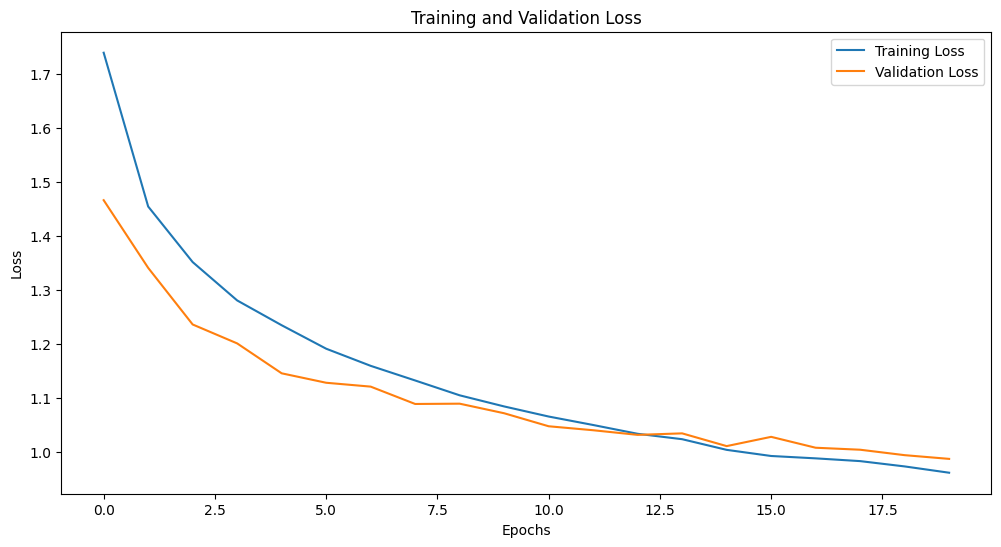

In [20]:
cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dropout(0.3))
cnn_model.add(layers.Dense(10, activation='softmax'))

# Compile the model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
cnn_model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy')

# Train the model for 20 epochs
num_epochs = 20
history = cnn_model.fit(train_images,
                        train_labels,
                        epochs=num_epochs,
                        validation_split=0.2)

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()